In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def generateMultiVariateDist(mean, cov, n=100000):
    x, y = np.random.multivariate_normal(mean, cov, n).T
    return x,y

In [57]:
meanA = [2.5, 2]
covA = [[1, 0.5], [0.5, 1]]  # diagonal covariance
# ---
meanB = [2.8, 2]
covB = [[1, 0.5], [0.5, 1]]  # diagonal covariance
# ---
commissionA, costA = generateMultiVariateDist(meanA, covA)
commissionB, costB = generateMultiVariateDist(meanB, covB)

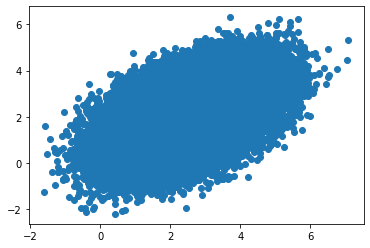

In [65]:
plt.scatter(commissionA,costA)

In [58]:
%matplotlib inline

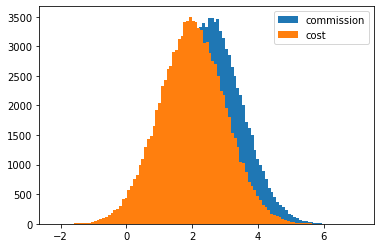

In [59]:
_ = plt.hist(commissionA,bins=100,label="commission")
_ = plt.hist(costA,bins=100,label="cost")
plt.legend()

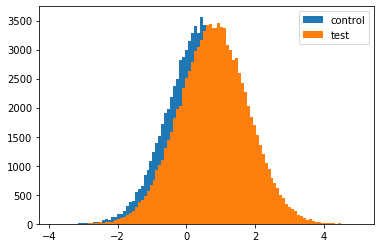

In [66]:
profitA = commissionA-costA
profitB = commissionB-costB
_ = plt.hist(profitA,bins=100,label="control")
_ = plt.hist(profitB,bins=100,label="test")
plt.legend()

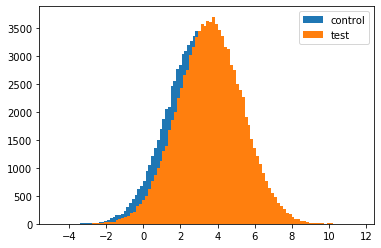

In [67]:
mod_profitA = 2*commissionA-costA
mod_profitB = 2*commissionB-costB
_ = plt.hist(mod_profitA,bins=100,label="control")
_ = plt.hist(mod_profitB,bins=100,label="test")
plt.legend()

In [63]:
from scipy import stats
stats.ttest_ind(profitA, profitB, equal_var = False)

Ttest_indResult(statistic=-65.28010514730586, pvalue=0.0)

In [160]:
# Simulate t-tests


def generate_t_tests(
    mroi_factor,
    mean_commission = 2,
    mean_cost = 1.5,
    cov_commission_cost = 0.4,
    simulated_increment=1.02, 
    N=1000, 
    n_samples=10000
):
    
    np.random.seed(1000)
    p_values_profit = []
    p_values_mod_profit = []
    for i in range (0,N):
    
        meanA = [mean_commission, mean_cost]
        covA = covB = [[1, cov_commission_cost], [cov_commission_cost, 1]]  # diagonal covariance
        meanB = [mean_commission*simulated_increment, mean_cost]
        commissionA, costA = generateMultiVariateDist(meanA, covA, n=n_samples)
        commissionB, costB = generateMultiVariateDist(meanB, covB, n=n_samples)
        #plt.scatter(commissionA,costA)
        # ------
        profitA = commissionA-costA
        profitB = commissionB-costB
        # -----
        mod_profitA = mroi_factor*commissionA-costA
        mod_profitB = mroi_factor*commissionB-costB
        # ----
        t_test_profit = stats.ttest_ind(profitA, profitB, equal_var = False)
        p_values_profit.append(t_test_profit[1]) 
        t_test_mod_profit = stats.ttest_ind(mod_profitA, mod_profitB, equal_var = False)
        p_values_mod_profit.append(t_test_mod_profit[1])
        
    
    return p_values_profit, p_values_mod_profit

In [171]:
powers_mod_profit = []
powers_profit = []
significance_level = 0.1
N = 1000
factors = np.arange(0.1,2,0.1)
print(factors)
for factor in factors:
    p_values_profit, p_values_mod_profit = generate_t_tests(mroi_factor=factor, N=1000)
    conclusive_profit = len([x for x in p_values_profit if x < significance_level])/N
    conclusive_mod_profit = len([x for x in p_values_mod_profit if x < significance_level])/N
    powers_mod_profit.append(conclusive_mod_profit)
    print(f"Conclusive profit: {conclusive_profit}")
    print(f"Conclusive mod profit ({factor}): {conclusive_mod_profit}")
    print("----")

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9]
Conclusive profit: 0.824
Conclusive mod profit (0.1): 0.108
----
Conclusive profit: 0.824
Conclusive mod profit (0.2): 0.158
----
Conclusive profit: 0.824
Conclusive mod profit (0.30000000000000004): 0.226
----
Conclusive profit: 0.824
Conclusive mod profit (0.4): 0.322
----
Conclusive profit: 0.824
Conclusive mod profit (0.5): 0.442
----
Conclusive profit: 0.824
Conclusive mod profit (0.6): 0.556
----
Conclusive profit: 0.824
Conclusive mod profit (0.7000000000000001): 0.661
----
Conclusive profit: 0.824
Conclusive mod profit (0.8): 0.738
----
Conclusive profit: 0.824
Conclusive mod profit (0.9): 0.787
----
Conclusive profit: 0.824
Conclusive mod profit (1.0): 0.824
----
Conclusive profit: 0.824
Conclusive mod profit (1.1): 0.851
----
Conclusive profit: 0.824
Conclusive mod profit (1.2000000000000002): 0.871
----
Conclusive profit: 0.824
Conclusive mod profit (1.3000000000000003): 0.886
----
Conclusive prof

Text(0, 0.5, 'power')

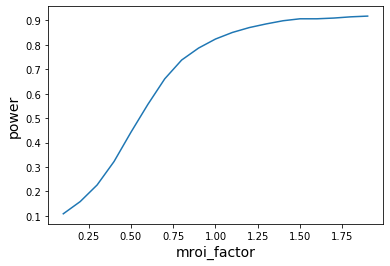

In [174]:
factors
plt.plot(factors,powers_mod_profit)
plt.xlabel("mroi_factor", fontsize=14)
plt.ylabel("power", fontsize=14)